# Neural NetWork

According to [IBM](https://www.ibm.com/topics/neural-networks). A neural network is a machine learning program, or model, that makes decisions in a manner similar to the human brain, by using processes that mimic the way biological neurons work together to identify phenomena, weigh options and arrive at conclusions.

In [8]:
pip install keras

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     ----------------------- -------------- 30.7/48.7 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 349.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 1.9 MB/s eta 0:00:01
   ---- ----------------------------------- 0.1/1.2 MB 1.4 MB/s eta 0:00:01
   -------- ------------------------------- 0.2/1.2 MB 1.9 MB/s eta 0:00:01
   -------------- ------------------------- 0.4/1.2 MB 2.3 MB/s eta 0:00:01
   ----------------------- ---------------- 0.7/1.2 MB 2.9 MB/s eta 0:00:01
   ------------------------------------ --- 1.1/1.2 MB 3.8 MB/s eta 0:00:01
   ------------------------------------ -

In [10]:
pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.2 MB 2.6 MB/s eta 0:02:33
   ---------------------------------------- 0.2/390.2 MB 2.3 MB/s eta 0:02:48
   ---------------------------------------- 0.2/390.2 MB 2.3 MB/s eta 0:02:48
   ---------------------------------------- 0.4/390.2 MB 2.1 MB/s eta 0:03:08
   ---------------------------------------- 0.4/390.2 MB 1.6 MB/s eta 0:04:02
   ---------------------------------------- 0.6/390.2 MB 1.9 MB/s eta 0:03:23
   ---------------------------------------- 0.7/390.2 MB 2.1 MB/s eta 0:03:10
   ----

In [35]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers, regularizers
from keras.layers import Dense, Input
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

### Cálculo do Número de Neurônios por Camada Escondida

Sabendo que uma ou duas camadas escondidas são suficientes, podemos calcular o número de neurônios por camada escondida, podemos usar a fórmula apresentada a seguir:

n <= DS - 10/10(d + 2)

onde:

- ( DS ) é o número de exemplos no dataset. <br>
- ( d ) é o número de características (features) na camada de entrada. <br>
- ( n ) é o número de neurônios na camada escondida. <br>

In [46]:
# calculo o número de neuronios para cada camada
def qnt_neuro(qnt_ex,d):
  n = (qnt_ex - 10) / (10*(d+2))
  return int(n)

Pela teoria, a dimensão VC é aproximadamente igual ao número de parâmetros. 
Sabendo disso calculamos:

In [50]:
def calcular_dVC(qnt_neuro, d, saida=1):
    pesos_escondidos = (d + 1) * qnt_neuro # Pesos da camada escondida
    pesos_saida = (qnt_neuro + 1) * saida # Pesos da camada de saída
    dVC = pesos_escondidos + pesos_saida     # Dimensão VC aproximada (número total de pesos)
    
    return dVC

Verificação da Regra de Ouro: Sugere que a dimensão VC deve ser menor do que o número de exemplos para garantir uma boa capacidade de generalização.
Com isso, calculamos a quantidade recomendada de exemplos de treino com base na Regra de Ouro. <br>
Essa abordagem considera que, para uma boa generalização, o número de exemplos de treino deve ser pelo menos 10 vezes a dimensão VC.

In [51]:
def regra_ouro(dVC):
    return 10 * dVC

### Balanceamento dos dados

Ao aplicar o modelo, percebemos que ele está tendo dificuldade em classificar corretamente a classe minoritária (classe "1"). Com isso, percebe-se a necessidade do balanceamento nos nossos dados de treino.

In [39]:
from imblearn.under_sampling import RandomUnderSampler

print("Distribuição antes do downsampling:")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))  # Mostra a contagem de cada classe

# Criando o RandomUnderSampler
rus = RandomUnderSampler(random_state=30)
X_rn, y_rn = rus.fit_resample(X_train, y_train)  # Aplicando o downsampling

# Verificando a nova distribuição das classes após o downsampling
print("\nDistribuição após o downsampling:")
unique, counts = np.unique(y_rn, return_counts=True)
print(dict(zip(unique, counts)))  # Mostra a contagem de cada classe

Distribuição antes do downsampling:
{1: 6446, 2: 64862}

Distribuição após o downsampling:
{1: 6446, 2: 6446}


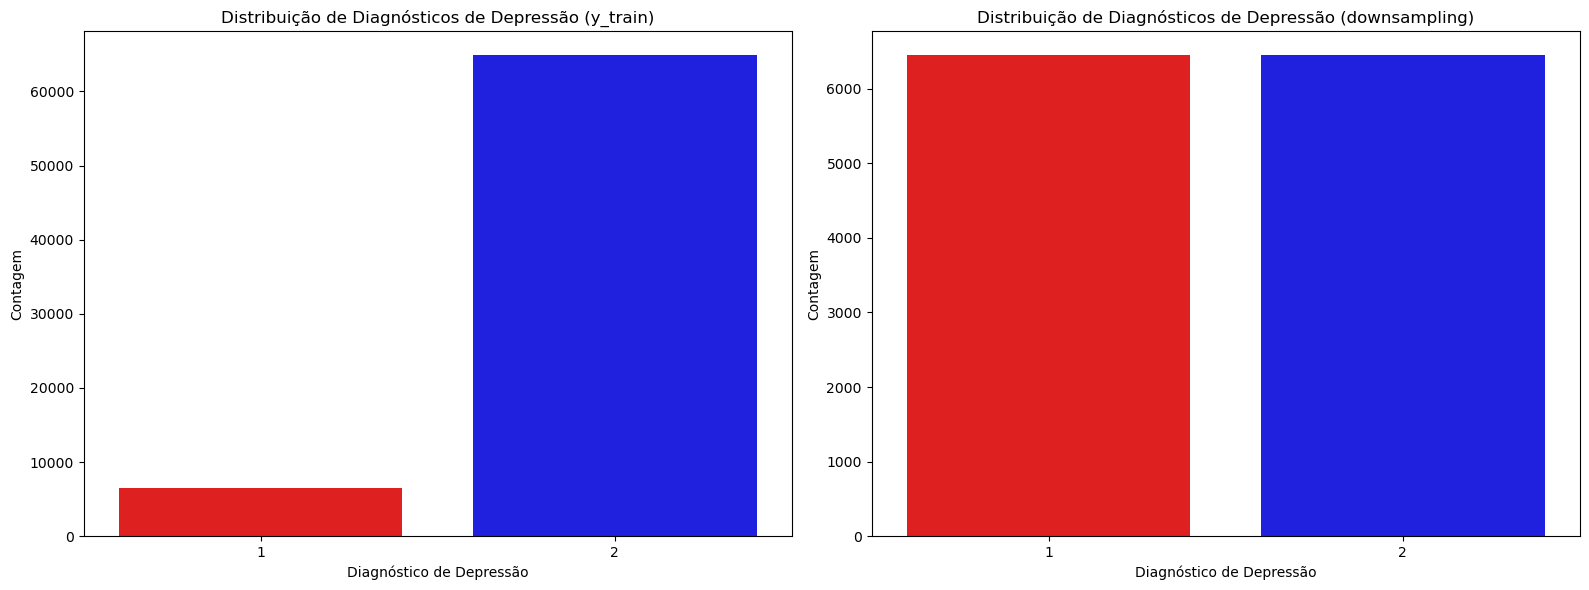

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma figura com dois subplots
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)  # 1º gráfico
sns.countplot(x=y_train.squeeze(), palette=['red', 'blue'])  # .squeeze() para converter para array unidimensional
plt.title('Distribuição de Diagnósticos de Depressão (y_train)')
plt.xlabel('Diagnóstico de Depressão')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)  # 2º gráfico
sns.countplot(x=y_rn.squeeze(), palette=['red', 'blue'])
plt.title('Distribuição de Diagnósticos de Depressão (downsampling)')
plt.xlabel('Diagnóstico de Depressão')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

### Parametros do Modelo

In [47]:
qnt_ex = X_rn.shape[0]
d = X_rn.shape[1]

print(f'Quantidade de exemplos: {qnt_ex}')
print(f'Quantidade de features: {d}')

qnt_neuronios = qnt_neuro(qnt_ex,d)
print(f'\nNeurônios por camada: {qnt_neuronios}')

Quantidade de exemplos: 12892
Quantidade de features: 27

Neurônios por camada: 44


In [49]:
d = 27  # Número de features
qnt_neuronios = 44  # Número de neurônios na camada escondida

dimensao_VC = calcular_dVC(qnt_neuronios, d)
print(f"Dimensão VC: {dimensao_VC}")

Dimensão VC: 1277


In [52]:
qnt_ex = 12892  # Quantidade de exemplos disponível no treino
print("Quantidade de exemplos para treino que temos: ", qnt_ex)
print("Quantidade de exemplos para treino que precisamos: ", regra_ouro(dimensao_VC))

Quantidade de exemplos para treino que temos:  12892
Quantidade de exemplos para treino que precisamos:  12770


### Modelo

Sabendo que uma ou duas camadas escondidas são suficientes e os parametros corretos podemos aplicar definir nossa rede.

In [53]:
# Criando a arquitetura da rede neural com ajuste de hiperparâmetros
model = Sequential()

# a tanh possui regiões onde a derivada é quase zero, o que pode levar a dificuldades no ajuste dos pesos durante o treinamento
model.add(Input(shape=(X_rn.shape[1],)))
model.add(Dense(51, input_dim=X_rn.shape[1], kernel_initializer='normal', activation='relu'))  # Camada oculta 1
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))  # Camada de saída

# Instanciação e configuração de otimizadores com taxa de aprendizado ajustada
sgd = optimizers.SGD(learning_rate=0.01)

# Compila o modelo
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

C:\Users\Mariana\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 51)                  │           1,428 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,480 (5.78 KB)

 Trainable params: 1,480 (5.78 KB)

 Non-trainable params: 0 (0.00 B)

None


In [54]:
# Treinamento do modelo com os dados balanceados
history = model.fit(X_rn, y_rn, epochs=120, batch_size=60)

Epoch 1/120
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4850 - loss: 0.2573
Epoch 2/120
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5076 - loss: -0.8791
Epoch 3/120
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4978 - loss: -1.6059
Epoch 4/120
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4976 - loss: -2.1951
Epoch 5/120
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5042 - loss: -2.7170
Epoch 6/120
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4930 - loss: -3.3261
Epoch 7/120
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5003 - loss: -3.8190
Epoch 8/120
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5060 - loss: -4.3069
Epoch 9/120
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5019 - loss: -4.8809
Epoch 10/120
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5011 - loss: -5.4201
Epoch 11/120
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5042 - loss: -5.9230
Epoch 12/120
215/215 ━━━━━━━━━━

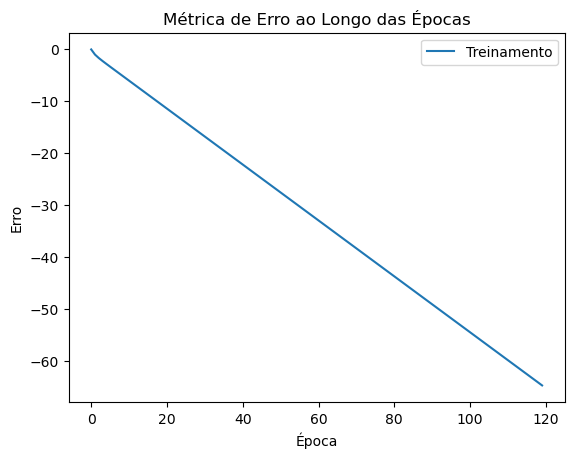

403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0879 - loss: -118.5025

--> Acurácia (treino): 0.5000
--> Acurácia (teste): 0.0904
--> E_out - E_in = -53.4925
--> acc_train - acc_test = 0.4096


In [55]:
# Plotando a métrica de erro ao longo das épocas
plt.plot(history.history['loss'])
plt.title('Métrica de Erro ao Longo das Épocas')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(['Treinamento'])
plt.show()

# Avaliando a acurácia usando accuracy_score() nos dados de treino
pred = np.round(model.predict(X_rn))
acc_train = accuracy_score(y_rn, pred)

# Avaliando nos dados de teste
E_out, acc_test = model.evaluate(X_test, y_test, batch_size=60)

print(f'\n--> Acurácia (treino): {acc_train:.4f}')
print(f'--> Acurácia (teste): {acc_test:.4f}')
print(f"--> E_out - E_in = {E_out - history.history['loss'][-1]:.4f}")
print(f"--> acc_train - acc_test = {acc_train - acc_test:.4f}")

In [56]:
# Previsões e Avaliação do Modelo
y_train_pred = model.predict(X_rn) > 0.5
y_test_pred = model.predict(X_test) > 0.5

# Calculando métricas
Ein = 1 - accuracy_score(y_rn, y_train_pred)
Eout = 1 - accuracy_score(y_test, y_test_pred)

print(f'Ein: {Ein:.4f}')
print(f'Eout: {Eout:.4f}')

# Relatório de classificação
print("\nRelatório de classificação (dados de teste):")
print(classification_report(y_test, y_test_pred.astype(int)))

403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Ein: 0.5000
Eout: 0.9096

Relatório de classificação (dados de teste):
              precision    recall  f1-score   support

         1.0       0.09      1.00      0.17      1611
         2.0       0.00      0.00      0.00     16216

    accuracy                           0.09     17827
   macro avg       0.05      0.50      0.08     17827
weighted avg       0.01      0.09      0.01     17827



C:\Users\Mariana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mariana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mariana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
